Boston housing dataset has 489 data points with 4 variables each.
Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13
Model has a coefficient of determination, R^2, of 0.923.


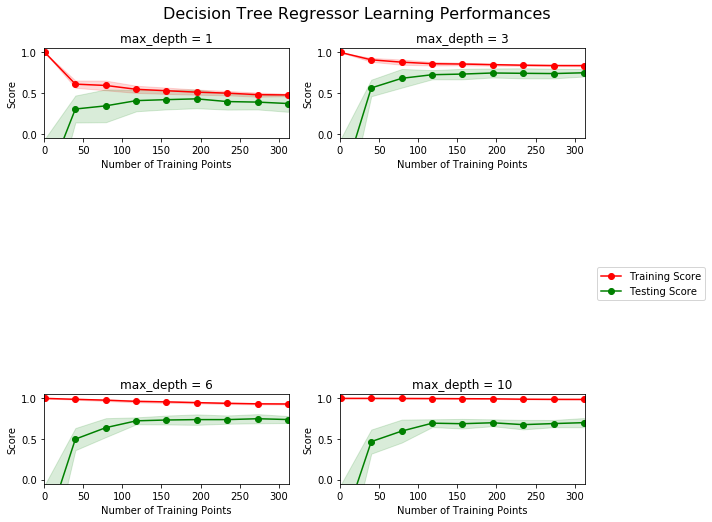

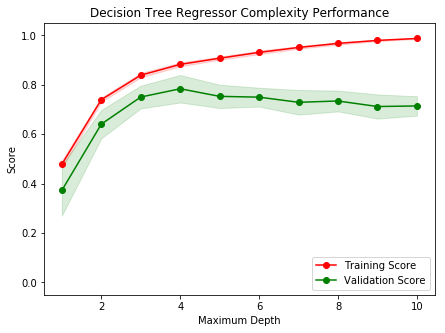

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000652      0.000230         0.000454        0.000151   
1       0.000504      0.000008         0.000502        0.000002   
2       0.000756      0.000250         0.000250        0.000250   
3       0.000853      0.000230         0.000197        0.000241   
4       0.000956      0.000151         0.000194        0.000238   
5       0.000902      0.000199         0.000201        0.000246   
6       0.001052      0.000151         0.000198        0.000243   
7       0.001005      0.000007         0.000301        0.000245   
8       0.001099      0.000198         0.000202        0.000248   
9       0.001098      0.000204         0.000253        0.000253   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               1   {'max_depth': 1}           0.312462           0.465708   
1               2   {'max_depth': 2}           0.638274           0.713474   
2               3   {'max_de

D:\python3.6.1\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\python3.6.1\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\python3.6.1\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\python3.6.1\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You

In [12]:

# 载入此项目所需要的库
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


# 载入波士顿房屋的数据集
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

# 完成
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))


minimum_price = min(prices)


maximum_price = max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price =np.std(prices)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))


X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)

    return score

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


vs.ModelLearning(X_train, y_train)
vs.ModelComplexity(X_train, y_train)




def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""

    cross_validator = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)

    regressor = DecisionTreeRegressor(random_state=10)

    params = {"max_depth":range(1,11)}

    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)

    print(pd.DataFrame(grid.cv_results_))
    # 返回网格搜索后的最优模型
    return grid.best_estimator_

# 基于训练数据，获得最优模型
optimal_reg = fit_model(X_train, y_train)

# 输出最优模型的 'max_depth' 参数
print("Parameter 'max_depth' is {} for the optimal model.".format(optimal_reg.get_params()['max_depth']))

# 生成三个客户的数据
client_data = [[5, 17, 15], # 客户 1
               [4, 32, 22], # 客户 2
               [8, 3, 12]]  # 客户 3

# 进行预测
predicted_price = optimal_reg.predict(client_data)
for i, price in enumerate(predicted_price):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    

predicted = optimal_reg.predict(X_test)
r2 = performance_metric(y_test,predicted)

print("Optimal model has R^2 score {:,.2f} on test data".format(r2))    
